In [ ]:
#colab 버전

# 이 부분은 처음 한번만 실행하면 됌.
# 코드 수정 - "The reason is that the last Ubuntu update update supports chromium driver just via snap."
# 최근 우분투 업데이트에서 크롬 드라이버 설치를 snap을 이용해서만 하도록 바뀜
# 고로 snap 없이 설치하는 아래 우회 코드로 변경
# 출처 : https://colab.research.google.com/drive/1cbEvuZOhkouYLda3RqiwtbM-o9hxGLyC
# 출처2 : https://stackoverflow.com/questions/75155063/selenium-use-chrome-on-colab-got-unexpectedly-exited

%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

# Install chromium and chromium-driver
apt-get update
apt-get install chromium chromium-driver

# Install selenium
pip install selenium==4.1.5

Executing: /tmp/apt-key-gpghome.FrFfuHBntq/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: public key "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.wEtfPyfk6b/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: public key "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.jqMSZGdpub/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: public key "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Get:1 http://deb.debian.org/debian buster InRelease [122 kB]
Get:2 http://deb.debian.org/debian bust

# 0.사전준비

## 0-1.실습에 필요한 라이브러리(코드묶음) 설치

In [ ]:
#인터넷을 구동시키는 라이브러리 설치
!pip install selenium==4.1.5
import selenium
selenium.__version__

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


'4.1.5'

In [ ]:
##워드클라우드를 만드는 라이브러리
!pip install wordcloud
### 윈도우 키 > prompt 검색 > anaconda prompt 클릭 > 아래의 코드 입력
### !conda install -c conda-forge wordcloud=1.8.1
import wordcloud
wordcloud.__version__

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


'1.8.1'

In [ ]:
#실습에 필요한 라이브러리 가져오기(추후 설명 예정)

#PC버전
import urllib.request
url = "http://pop.baemin.com/fonts/jua/BMJUA_ttf.ttf"
savename = "BMJUA_ttf.ttf"
urllib.request.urlretrieve(url, savename)
print("저장되었습니다..!")
!pip install webdriver_manager
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
service = Service(executable_path=ChromeDriverManager().install()) #크롬드라이버 설치
options = webdriver.ChromeOptions()
options.add_argument('--no-sandbox')
driver = webdriver.Chrome(service=service)

저장되었습니다..!
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[WDM] - Downloading: 100%|██████████| 6.98M/6.98M [00:00<00:00, 189MB/s]


WebDriverException: ignored

In [ ]:
# # #colab버전

# # #필요자료다운로드
# # #colab 환경을 만들기 위한 작업 (이해못해도 괜찮아요)

# # # 폰트설치 NanumBarunGothic
# # !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# # 배민JUA체
# # !wget "http://pop.baemin.com/fonts/jua/BMJUA_ttf.ttf"



# !pip install selenium
# !apt-get update
# !apt install chromium-chromedriver
# !cp /usr/lib/chromium-browser/chromedriver /usr/bin

# from selenium.webdriver.common.by import By
# from selenium.webdriver.common.keys import Keys
# from selenium import webdriver

# options = webdriver.ChromeOptions()
# options.add_argument('--headless')        # Head-less 설정
# options.add_argument('--no-sandbox')
# options.add_argument('--disable-dev-shm-usage')
# driver = webdriver.Chrome('chromedriver', options=options)

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Hit:1 http://deb.debian.org

@기본 웹 브라우저 크롬으로 설정

## 0-2.함께 만들어 볼 프로그램 One Code 체험
1. 인터넷에 있는 특정단어("반도체")와 관련된 기사의 제목을 가져온다.
2. 가져온 기사를 엑셀 한 시트로 만든다.
3. 가져온 기사 제목을 모아서 워드클라우드로 제작한다.
4. 제작된 이미지를 원하는 곳으로 전송한다.

In [ ]:

#PC버전
!pip install selenium==4.1.5
!pip install pandas
!pip install openpyxl
!pip install xlwt
!pip install wordcloud
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
service = Service(executable_path=ChromeDriverManager().install()) #크롬드라이버 설치
options = webdriver.ChromeOptions()
options.add_argument('--no-sandbox')
driver = webdriver.Chrome(service=service) #드라이브 켜기
#1-4.뉴스탭을 클릭한다(+ 최신순)
#유튜브의 뉴스탭만 클릭하고 싶으면?  driver.get("https://search.naver.com/search.naver?where=news&sm=tab_jum&query=반도체")
driver.get("https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EB%B0%98%EB%8F%84%EC%B2%B4")
#1-5.뉴스탭에 나오는 기사들을 최신순으로 배열하여 리스트 변수에 담는다.
type(driver.find_elements(By.CLASS_NAME,"list_news"))
first_sel = driver.find_element(By.CLASS_NAME,"list_news")
second_sel = first_sel.find_elements(By.TAG_NAME,"li")
news_title_lists = []
for a in second_sel:
    news_title_lists.append(a.text.replace("\n",""))
news_title_lists
#2-1. 1단계에서 만들어진 리스트변수를 엑셀로 변환한다.
import pandas as pd #pandas 라이브러리를 가져온다.
df = pd.DataFrame(news_title_lists) #news_title_lists 에 있는 데이터를 pandas데이터프레임으로 저장한다.
df.to_excel('bhyunco_test.xlsx')
#3-1. 1단계에서 만들어진 리스트변수의 본문들을 합쳐서 워드크라우드를 만드는 라이브러리를 만든다.
# import sys
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS) #불용어 지정 (조사등)
wc = WordCloud(font_path="BMJUA_ttf.ttf",stopwords=stopwords) #wc 변수에 wordcloud 객체지정
wc.generate(str(news_title_lists))
wc.to_file('wordcloud.png')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------추출한 텍스트는? -----------------------------------------
['문서 저장하기연합뉴스언론사 선정1일 전네이버뉴스지능형·전력 반도체 등 유망기술 선제확보…반도체 초격차 유지반도체 국가전략회의…1.4조원 규모 예타 추진 메모리 가치사슬, 시스템반도체로 확장…올 하반기 \'3천억 반도체 펀드\' 출범 신기술 요람 \'첨단반도체센터\' 추진…2027년까지 2.8조원 정책금융도 "\'파괴적 혁신\'으로...조선비즈언론사 선정1일 전네이버뉴스“반도체 초격차 유지”… 하반기에 3000억원 규모 반도체펀드 출범서울경제언론사 선정21시간 전네이버뉴스尹 "반도체 국가총력전"…3000억 스타트업 스케일업 신규펀드 조성전자신문언론사 선정1일 전네이버뉴스[국가전략회의-반도체]정부 “민·관 합심해 ‘반도체 초강대국’ 달성”이데일리20시간 전네이버뉴스"유망 반도체 기술 선제확보"…1.4조원 R&D 지원관련뉴스 6건 전체보기', '조선비즈언론사 선정1일 전네이버뉴스“반도체 초격차 유지”… 하반기에 3000억원 규모 반도체펀드 출범', '서울경제언론사 선정21시간 전네이버뉴스尹 "반도체 국가총력전"…3000억 스타트업 스케일업 신규펀드 조성', '전자신문언론사 선정1일 전네이버뉴스[국가전략회의-반도체]정부 “민·관 합심해 ‘반도체 초강대국’ 달성”', '이데일리20시간 전네이버뉴스"유망 반도체 기술 선제확보"…1.4조원 R&D 지원', '문서 저장하기조선일보언론사 선정1시간 전네이버뉴스챗GPT 아버지 샘 올트먼“한국과 전용 반도체 칩 개발하고 싶어”한

# 1.인터넷으로 해결할 수 있는 업무

- 인터넷 제어
- 인터넷 정보 획득

In [ ]:
#사례1) 거래가능고객정보 획득
#사례2) 키워드분석 통계 키워드분석
#사례3) 인트라넷 이메일 정리기능
#무엇이든 원한다면.. 모두할수있다.

# 2.selenium 기본

## 2-1.selenium 설치 및 라이브러리 가져오기

In [ ]:
# selenium 라이브러리를 인터넷에서 가져오기
# !pip install selenium #기본최신본설치
!pip install selenium==4.1.5
# selenium 4.1.5 버전 설치

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#write your code (백견이 불여일타)

## 2-2.웹브라우저 드라이버 설치 (크롬 기본)

### PC버전

In [ ]:
#크롬드라이버 자동 설치 (selenium 4.0 버전이후)
!pip install selenium webdriver_manager
# pc버전
import selenium
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
service = Service(executable_path=ChromeDriverManager().install()) #크롬 드라이버 설치

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


[WDM] - Downloading: 100%|██████████| 7.26M/7.26M [00:00<00:00, 175MB/s]


### Colab버전

In [ ]:
# #colab버전
# !pip install selenium
# !apt-get update
# !apt install chromium-chromedriver
# !cp /usr/lib/chromium-browser/chromedriver /usr/bin

# from selenium.webdriver.common.by import By
# from selenium.webdriver.common.keys import Keys
# from selenium import webdriver

# options = webdriver.ChromeOptions()
# options.add_argument('--headless')        # Head-less 설정
# options.add_argument('--no-sandbox')
# options.add_argument('--disable-dev-shm-usage')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:6 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu

In [ ]:
#write your code (백견이 일여불타)

## 2-3.인터넷 열기

### pc버전

In [ ]:
#pc버전
# driver = webdriver.Chrome(service=service) #드라이브 켜기
driver = webdriver.Chrome("c:\chromedriver.exe") #드라이브 켜기
driver.get('http://www.naver.com')

### colab 버전

In [ ]:
# #colab 버전
# driver = webdriver.Chrome('chromedriver', options=options)
# driver.get('http://www.naver.com')

In [ ]:
#write your code (백견이 불여일타)

'<html lang="ko" data-dark="false" data-useragent="Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) HeadlessChrome/105.0.5195.102 Safari/537.36"><head><script async="" type="text/javascript" src="https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js"></script> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robots" content="index,nofollow"> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url
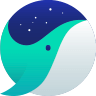
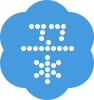

In [ ]:
#네이버의 메인제목 텍스트 가져오기(따라서 처보기)
driver.page_source

In [ ]:
#write your code (백견이 불여일타)

In [ ]:
#네이버의 특정 부분 텍스트 가져오기(보기만하기)
driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div[2]').text

''

In [ ]:
#write your code (백견이 불여일타)

## 2-4.요소(element)란?

https://ko.wikipedia.org/wiki/HTML_%EC%9A%94%EC%86%8C

-> 우리가 보는 HTML 을 구성하고 있는 단위<br>
-> 모든 HTML 구조의 마지막 자손 1개를 요소라고 명명할 수 있음<br>
-> 아버지 요소에는 아들요소들이 모두 함께 들어감<br>
-> 할어버지 요소에는 아버지,아들 요소들이 모두 함께 들어감<br>
https://codepen.io/bhyunco/pen/VwpXYvP

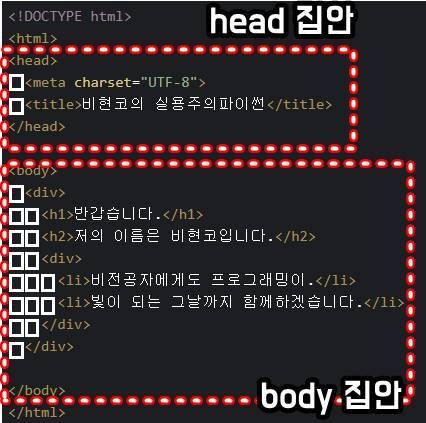

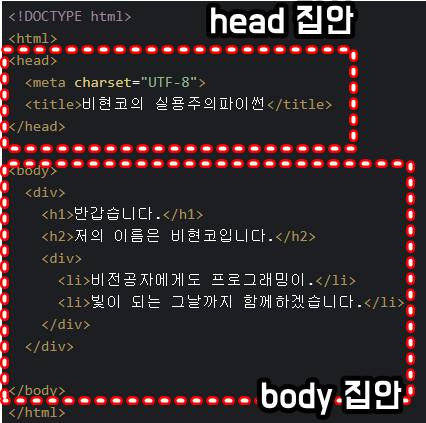

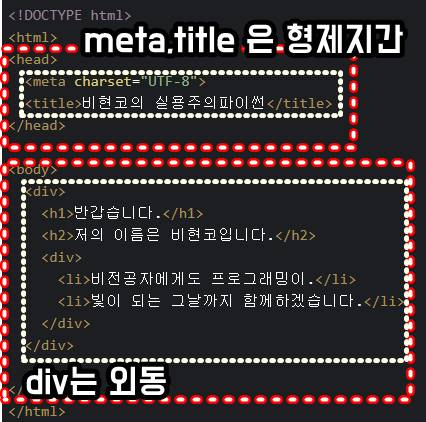


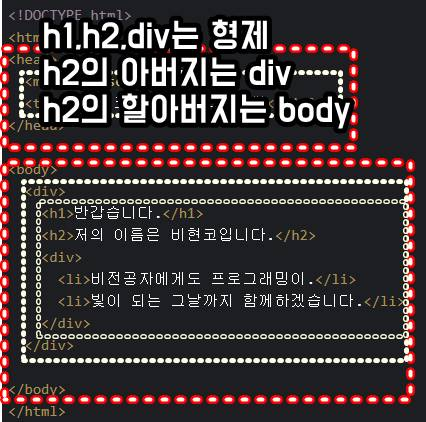


In [ ]:
# F12 를 켜고, HTML 코드를 분석해보자


### 2-4-1-1.요소찾기(find_element-------)

In [ ]:
# class , tag , id ,xpath  등을 통한 찾기
driver.get("https://www.google.com//?hl=")
#1순위 id
id_sel = driver.find_element(By.ID,'gb')
print(id_sel.text) #print 출력의 의미

GmailImages
Sign in


In [ ]:
#write your code (백견이 불여일타)

In [ ]:
#2순위 class,tag 등
class_sel = driver.find_element(By.CSS_SELECTOR,'#gb > div')
print(class_sel.text)

GmailImages
Sign in


In [ ]:
#write your code (백견이 불여일타)

In [ ]:
#3순위(최후의 보루) xpath
xpath_sel = driver.find_element(By.XPATH,"/html/body/div[1]/div[1]/div/div/div")
print(xpath_sel.text)

GmailImages
Sign in


In [ ]:
#write your code (백견이 불여일타)

#### 2-4-1-2.동일요소/다른선택자비교

In [ ]:
!pip install selenium==4.1.5
!pip install webdriver_manager
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
service = Service(executable_path=ChromeDriverManager().install()) #크롬드라이버 설치
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service=service)


[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
#google 접속
driver.get('http://www.google.com//?hl=')

In [ ]:
#xpath_full
# temp_path="/html/body/div[1]/div[1]/div/div/div/div[1]/div/div[1]/a"
temp_path=""
fullxpath_sel = driver.find_element(By.XPATH,temp_path)
print("fullxpath:",fullxpath_sel.text)

fullxpath: Gmail


In [ ]:
#xpath : //*[@id="gb"]/div/div[1]/div/div[1]/a
# temp_path='//*[@id="gb"]/div/div[1]/div/div[1]/a'
temp_path=""
xpath_sel = driver.find_element(By.XPATH,temp_path)
print("xpath:",xpath_sel.text)

xpath: Gmail


In [ ]:
#css_selector : #gb > div > div:nth-child(1) > div > div:nth-child(1) > a
# temp_path='#gb > div > div:nth-child(1) > div > div:nth-child(1) > a'
temp_path=""
csss_sel = driver.find_element(By.CSS_SELECTOR,temp_path)
print("css selector:",csss_sel.text)

css selector: Gmail


In [ ]:
#class : gb_v
# temp_path='gb_v'
temp_path=""
class_sel = driver.find_element(By.CLASS_NAME,temp_path)
print("class:",class_sel.text)

class: Gmail


In [ ]:
#id gb
temp_path='gb'
temp_path=""
id_sel = driver.find_element(By.ID,temp_path)
print("id:",id_sel.text)

id: Gmail이미지
로그인


### 2-4-2.요소 데이터 한개 가져오기 - 가장먼저나오는 요소선택
driver.find_element(By.CLASS_NAME,"")<br>
driver.find_element(By.ID,"")<br>
driver.find_element(By.TAG_NAME,"")<br>
driver.find_element(By.XPATH,"")

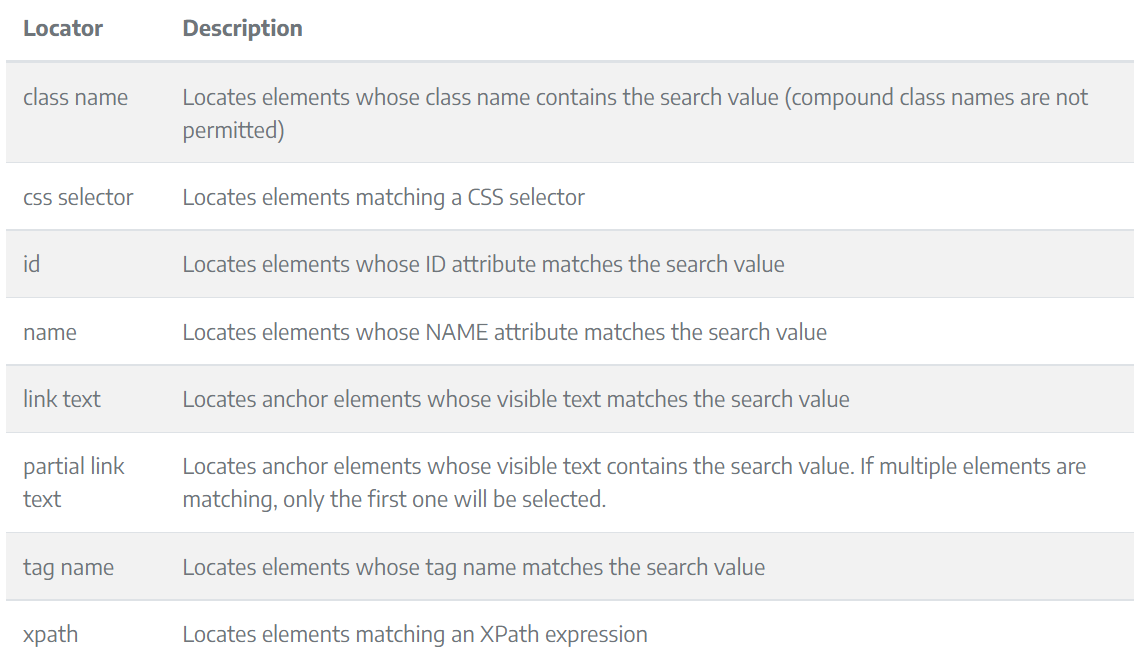

In [ ]:
 # 실행하지 말고, 자동완성 기능인 Shift+Tap or Tap을 눌러보기
 # driver.find_element(By.)


'<div class="o3j99 n1xJcf Ne6nSd"><style data-iml="1667265209509">.Ne6nSd{display:flex;align-items:center;padding:6px}a.MV3Tnb{display:inline-block;padding:5px;margin:0 5px;color:#202124}a.MV3Tnb:first-of-type{margin-left:15px}.LX3sZb{display:inline-block;flex-grow:1}</style><a class="MV3Tnb" href="https://about.google/?fg=1&amp;utm_source=google-US&amp;utm_medium=referral&amp;utm_campaign=hp-header" data-jsarwt="1" data-usg="AOvVaw13L0SpN0L7ycx9R0_i4R2S" data-ved="0ahUKEwitiLP05ov7AhWQKVkFHf1yDNgQkNQCCAI">About</a><a class="MV3Tnb" href="https://store.google.com/US?utm_source=hp_header&amp;utm_medium=google_ooo&amp;utm_campaign=GS100042&amp;hl=en-US" data-jsarwt="1" data-usg="AOvVaw0wvkRBURf91YdMQCXOelDf" data-ved="0ahUKEwitiLP05ov7AhWQKVkFHf1yDNgQpMwCCAM">Store</a><div class="LX3sZb"><div class="gb_pa gb_Zd gb_2a gb_Qd" id="gb"><div class="gb_Wd gb_Za gb_Ld" data-ogsr-up=""><div><div class="gb_8d gb_f gb_mg gb_dg" data-ogbl=""><div class="gb_e gb_f"><a class="gb_d" data-pid="23" href
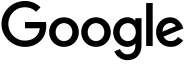

In [ ]:
#div 태그 가져오기
div_sel = driver.find_element(By.TAG_NAME,'div')
div_sel.get_attribute('innerHTML')

In [ ]:
#write your code (백견이 불여일타)


#### 2-4-2-1. 그밖의 요소찾기

In [ ]:
#name
driver.get('https://www.naver.com')
driver.find_element(By.NAME,'viewport').get_attribute('content')

'width=1190'

In [ ]:
#link text
driver.get('https://www.naver.com')
driver.find_element(By.LINK_TEXT,'아이디 찾기').get_attribute('outerHTML')

'<a href="https://nid.naver.com/user/help.nhn?todo=idinquiry" class="MyView-module__link_more___sbxGh">아이디 찾기</a>'

In [ ]:
# partial link text
driver.get('https://www.naver.com')
len(driver.find_elements(By.PARTIAL_LINK_TEXT,'아이디'))

1

##### 2-4-2-2. 그밖의 요소찾기(iframe)

In [ ]:
#예시1 네이버 카페
url = "http://cafe.naver.com/bhyunco"
driver.get(url)
driver.find_elements(By.CLASS_NAME,'inner_list')

[]

In [ ]:
#iframe 변경
driver.switch_to.frame("cafe_main")
driver.find_elements(By.CLASS_NAME,'inner_list')

[<selenium.webdriver.remote.webelement.WebElement (session="dc8dcaa3cd67f4b8c1e958432c5fcb1f", element="C6A83345A781A7EEB6A4FC249E635AA0_element_275")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dc8dcaa3cd67f4b8c1e958432c5fcb1f", element="C6A83345A781A7EEB6A4FC249E635AA0_element_276")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dc8dcaa3cd67f4b8c1e958432c5fcb1f", element="C6A83345A781A7EEB6A4FC249E635AA0_element_277")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dc8dcaa3cd67f4b8c1e958432c5fcb1f", element="C6A83345A781A7EEB6A4FC249E635AA0_element_278")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dc8dcaa3cd67f4b8c1e958432c5fcb1f", element="C6A83345A781A7EEB6A4FC249E635AA0_element_279")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dc8dcaa3cd67f4b8c1e958432c5fcb1f", element="C6A83345A781A7EEB6A4FC249E635AA0_element_280")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dc8dcaa3cd67f4b8c1e958

In [ ]:
#iframe 재변경
driver.switch_to.parent_frame()
driver.find_elements(By.CLASS_NAME,'inner_list')

[]

### 2-4-3. 요소 데이터 여러개 가져오기
driver.find_elements(By.CLASS_NAME,"")<br>
driver.find_elements(By.ID,"")<br>
driver.find_elements(By.TAG_NAME,"")<br>
driver.find_elements(By.XPATH,"")

In [ ]:
#div 태그 모두 가져오기
div_sels = driver.find_elements(By.TAG_NAME,'div')
print(len(div_sels))
div_sels[2].get_attribute('innerHTML')

107


'<div class="gb_pa gb_Zd gb_2a gb_Qd" id="gb"><div class="gb_Wd gb_Za gb_Ld" data-ogsr-up=""><div><div class="gb_8d gb_f gb_mg gb_dg" data-ogbl=""><div class="gb_e gb_f"><a class="gb_d" data-pid="23" href="https://mail.google.com/mail/&amp;ogbl" target="_top">Gmail</a></div><div class="gb_e gb_f"><a class="gb_d" data-pid="2" href="https://www.google.com/imghp?hl=en&amp;ogbl" target="_top">Images</a></div></div></div><div class="gb_Se"><div class="gb_Tc"><div class="gb_z gb_hd gb_f gb_Af" data-ogsr-fb="true" data-ogsr-alt="" id="gbwa"><div class="gb_zf"><a class="gb_A" aria-label="Google apps" href="https://www.google.com/intl/en/about/products" aria-expanded="false" role="button" tabindex="0"><svg class="gb_Ve" focusable="false" viewBox="0 0 24 24"><path d="M6,8c1.1,0 2,-0.9 2,-2s-0.9,-2 -2,-2 -2,0.9 -2,2 0.9,2 2,2zM12,20c1.1,0 2,-0.9 2,-2s-0.9,-2 -2,-2 -2,0.9 -2,2 0.9,2 2,2zM6,20c1.1,0 2,-0.9 2,-2s-0.9,-2 -2,-2 -2,0.9 -2,2 0.9,2 2,2zM6,14c1.1,0 2,-0.9 2,-2s-0.9,-2 -2,-2 -2,0.9 -2,2 0.

In [ ]:
#write your code (백견이 불여일타)


### 2-4-4.요소 데이터 넣기(send_Keys)

In [ ]:
#타이핑치기(PC에서 작동안함)
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
driver.get('http://www.google.com/?hl=')
input_sel = driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea")
input_sel.send_keys("비현코\n")



# #타이핑치기(colab에서 작동함)
# from selenium import webdriver
# from selenium.webdriver.common.keys import Keys
# driver.get('http://www.naver.com')
# input_sel = driver.find_element(By.ID,"query")
# input_sel.send_keys("비현코\n")

In [ ]:
#write your code (백견이 불여일타)

### 2-4-5.요소 클릭(click)

In [ ]:
#클릭1 _ selenium 클릭
driver.get('http://www.google.com/?hl=')
click_sel = driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[4]/center/input[2]")
click_sel.click()

In [ ]:
#write your code (백견이 불여일타)

In [ ]:
#클릭2 - 키보드 엔터
driver.get('http://www.google.com/?hl=')
from selenium.webdriver.common.keys import Keys
#참고 https://www.selenium.dev/documentation/webdriver/keyboard/#sendkeys
click_sel = driver.find_element(By.CLASS_NAME,"MV3Tnb")
click_sel.send_keys(Keys.ENTER)

In [ ]:
#write your code (백견이 불여일타)

In [ ]:
#클릭3 - 자바스크립트를 이용
driver.get('http://www.google.com/?hl=')
element = driver.find_element(By.CLASS_NAME,'RNmpXc')
# element.click()
# element.send_keys(Keys.ENTER)
driver.execute_script("arguments[0].click();", element)

In [ ]:
#write your code (백견이 불여일타)

### 2-4-6.요소 출력

In [ ]:
# 뉴스 제목, 링크, 요약 찾아서 출력하기
driver.get('http://www.google.com/?hl=')
html_sel = driver.find_element(By.CLASS_NAME,"o3j99.n1xJcf.Ne6nSd")
#요소의 텍스트를 출력
print(html_sel.text)
#요소의 하위 Html 코드를 모두출력
html_sel.get_attribute('innerHTML')

About
Store
GmailImages
Sign in


'<style data-iml="1667265230936">.Ne6nSd{display:flex;align-items:center;padding:6px}a.MV3Tnb{display:inline-block;padding:5px;margin:0 5px;color:#202124}a.MV3Tnb:first-of-type{margin-left:15px}.LX3sZb{display:inline-block;flex-grow:1}</style><a class="MV3Tnb" href="https://about.google/?fg=1&amp;utm_source=google-US&amp;utm_medium=referral&amp;utm_campaign=hp-header" data-jsarwt="1" data-usg="AOvVaw13L0SpN0L7ycx9R0_i4R2S" data-ved="0ahUKEwjW-8_-5ov7AhVNEVkFHawiDK4QkNQCCAI">About</a><a class="MV3Tnb" href="https://store.google.com/US?utm_source=hp_header&amp;utm_medium=google_ooo&amp;utm_campaign=GS100042&amp;hl=en-US" data-jsarwt="1" data-usg="AOvVaw0wvkRBURf91YdMQCXOelDf" data-ved="0ahUKEwjW-8_-5ov7AhVNEVkFHawiDK4QpMwCCAM">Store</a><div class="LX3sZb"><div class="gb_pa gb_Zd gb_2a gb_Qd" id="gb"><div class="gb_Wd gb_Za gb_Ld" data-ogsr-up=""><div><div class="gb_8d gb_f gb_mg gb_dg" data-ogbl=""><div class="gb_e gb_f"><a class="gb_d" data-pid="23" href="https://mail.google.com/mail/&a

In [ ]:
#write your code (백견이 불여일타)

### 2-4-7.연속동작

In [ ]:
#기다림없이 진행
import time
import math

start = time.time()
driver.get('https://www.google.com/?hl=')
element = driver.find_element(By.CLASS_NAME,'RNmpXc')
driver.execute_script("arguments[0].click();", element)
end = time.time()
print(f"{end - start:.5f} sec")

0.68132 sec


In [ ]:
#write your code (백견이 불여일타)

In [ ]:
#시간기다리기 (지정시간)

start = time.time()
driver.get('https://www.google.com/?hl=')
print('5초 뒤 시작')

time.sleep(5)

print('시작')

element = driver.find_element(By.CLASS_NAME,'RNmpXc')

driver.execute_script("arguments[0].click();", element)

end = time.time()
print(f"{end - start:.5f} sec")

5초 뒤 시작
시작
5.76834 sec


In [ ]:
#write your code (백견이 불여일타)

In [ ]:
#시간기다리기 (로딩될때까지 기다리기)
start = time.time()
driver.implicitly_wait(time_to_wait=5)
print('5초까지 기다릴수잇음')

driver.get('https://www.google.com/?hl=')

print('시작')
element = driver.find_element(By.CLASS_NAME,'RNmpXc')

driver.execute_script("arguments[0].click();", element)
end = time.time()
print(f"{end - start:.5f} sec")

5초까지 기다릴수잇음
시작
0.50852 sec


In [ ]:
#write your code (백견이 불여일타)

# 3.현업문제해결

## 3-1.상황설정

1. 인터넷에 있는 특정단어("반도체")와 관련된 기사의 제목을 가져온다.
2. 가져온 기사를 엑셀 한 시트로 만든다.
3. 가져온 기사 제목을 모아서 워드클라우드로 제작한다.
4. 제작된 이미지를 원하는 곳으로 전송한다.


* 주의 - 모든 코딩과정을 이해하고 따라오기에는 시간이 걸립니다.
그런 시간을 견디지 못하고 많은 비전공자분들이 코딩의 문턱을 넘지 못합니다.
각자의 학습스타일에 따라 다르겠지만,
이해하기보다는 "아~ 이렇게 쓰는구나!" 라고 생각하고 학습에 임해주세요.

마치, 우리가 엑셀의 vlookup,if등의 함수를 쓸 때,
하나하나 제작된 원리를 이해해서 하기보다는 자주 쓰다보니 외어지는 것 처럼 말이죠!

(제가 경험했던 가장 큰 실수는 모든 것을 이해하고 다음으로 넘어가려했기 때문입니다. 일단 기능에만 충실해주세요)

### 1단계-인터넷에 있는 특정단어와 관련된 기사 100개를 가져온다.(직접코딩)

In [ ]:
#1-1.인터넷에 접속한다
!pip install selenium==4.1.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### PC용

In [ ]:
#기본브라우저_자동화아님

from selenium import webdriver
from selenium.webdriver.common.by import By
driver = webdriver.Chrome("C:\chromedriver.exe") #드라이브 켜기

In [ ]:
# #실습에 필요한 라이브러리가 가져오기(추후 설명 예정)
# #PC버전
# from selenium import webdriver
# from selenium.webdriver.chrome.service import Service
# from webdriver_manager.chrome import ChromeDriverManager
# from selenium.webdriver.common.by import By
# service = Service(executable_path=ChromeDriverManager().install()) #크롬드라이버 설치
# options = webdriver.ChromeOptions()
# options.add_argument('--no-sandbox')
# driver = webdriver.Chrome(service=service) #드라이브 켜기


### COLAB용

In [ ]:
# # #colab 버전
# driver = webdriver.Chrome('chromedriver', options=options)

In [ ]:
#write your code (100견이 불여일타)

[][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]

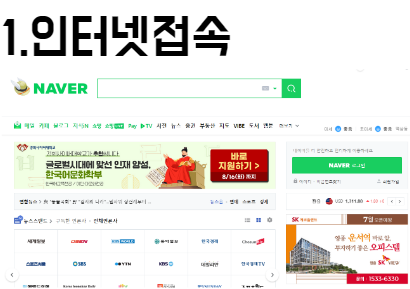

In [ ]:
#1-2.네이버에 접속한다.
# driver.get("https://www.naver.com")

In [ ]:
#write your code (100견이 불여일타)

[][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]

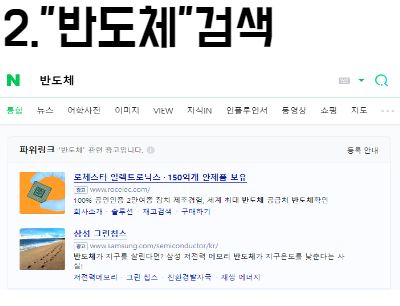

In [ ]:
#1-3.원하는 키워드를 검색한다.
# greenbox = driver.find_element(By.ID,"query")
# greenbox.send_keys("반도체")
# driver.find_element(By.ID,"searcj=btn").click()

In [ ]:
#write your code (100견이 불여일타)

[][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]

In [ ]:
#1-4.뉴스탭을 클릭한다(+ 최신순)
#유튜브의 뉴스탭만 클릭하고 싶으면?  driver.get("https://search.naver.com/search.naver?where=news&sm=tab_jum&query=반도체")
driver.get("https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EB%B0%98%EB%8F%84%EC%B2%B4")

In [ ]:
#write your code (100견이 불여일타)

[][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]

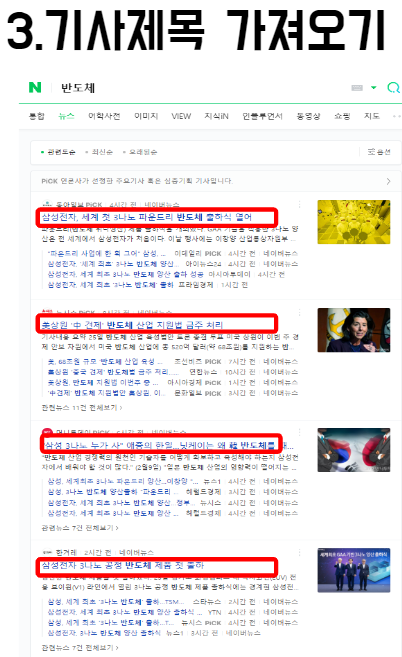

In [ ]:
#1-5.뉴스탭에 나오는 기사들을 최신순으로 배열하여 리스트 변수에 담는다.
type(driver.find_elements(By.CLASS_NAME,"list_news"))
first_sel = driver.find_element(By.CLASS_NAME,"list_news")
second_sel = first_sel.find_elements(By.TAG_NAME,"li")
news_title_lists = []
for a in second_sel:
    news_title_lists.append(a.text.replace("\n",""))
news_title_lists

["문서 저장하기연합뉴스4시간 전네이버뉴스3분기 반도체 생산 11% 급감…2008년 이후 최대폭 감소제조업 생산 2분기 연속 감소…반도체 재고 넉 달째 늘어 올해 3분기 반도체 생산이 두 자릿수 감소를 기록하며 2008년 이후 가장 큰 폭으로 줄었다. 반도체가 떠받치는 제조업 생산도 2분기 연속으로 감소하면서...IT조선6분 전3Q 반도체 생산량 감소폭 2008년 이후 최대한국경제TV2시간 전네이버뉴스3분기 반도체 생산 11% 급감…재고 넉 달째 늘어더팩트1시간 전네이버뉴스3분기 반도체 생산 11% '뚝'…글로벌 금융위기 이후 최대폭YTN12분 전네이버뉴스3분기 반도체 생산 11% 급감...금융위기 뒤 최대 감소관련뉴스 14건 전체보기",
 'IT조선6분 전3Q 반도체 생산량 감소폭 2008년 이후 최대',
 '한국경제TV2시간 전네이버뉴스3분기 반도체 생산 11% 급감…재고 넉 달째 늘어',
 "더팩트1시간 전네이버뉴스3분기 반도체 생산 11% '뚝'…글로벌 금융위기 이후 최대폭",
 'YTN12분 전네이버뉴스3분기 반도체 생산 11% 급감...금융위기 뒤 최대 감소',
 '문서 저장하기뉴시스9분 전네이버뉴스국내기업 등 반도체 특허출원 심사기간, 10개월 빨라진다생산하는 반도체기술 분야 특허출원을 1일부터 1년간 우선심사 대상으로 지정한다고 밝혔다. 이번 조치를 통해 국내 반도체 관련 기업, 연구개발기관, 대학 등이 우선심사를 이용할 경우 평균 2.5개월 만에 특허심사를 받을...뉴스11시간 전네이버뉴스특허청, 반도체 기술 특허출원 우선심사…10개월 단축파이낸셜뉴스1시간 전네이버뉴스특허청, 반도체 기술 특허출원 우선심사 시행연합뉴스1시간 전네이버뉴스국내 개발 반도체 기술 특허출원 우선심사…블록체인 기술도더팩트6분 전네이버뉴스특허청, 반도체 기술 특허출원 1년간 우선심사관련뉴스 8건 전체보기',
 '뉴스11시간 전네이버뉴스특허청, 반도체 기술 특허출원 우선심사…10개월 단축',
 '파이낸셜뉴스1시간 전네이버뉴스특허청, 반도체 기술 특허출원 우선심사 시행',
 

In [ ]:
#write your code (100견이 불여일타)

## 2단계-가져온 기사를 엑셀 한 시트로 만든다. (직접코딩)

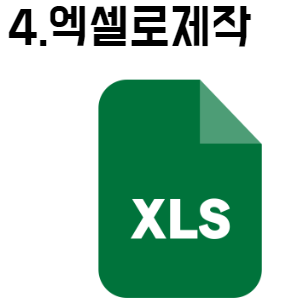

In [ ]:
#2-1. 1단계에서 만들어진 리스트변수를 엑셀로 변환한다.
!pip install pandas
!pip install openpyxl
!pip install xlwt
import pandas as pd #pandas 라이브러리를 가져온다.
df = pd.DataFrame(news_title_lists) #news_title_lists 에 있는 데이터를 pandas데이터프레임으로 저장한다.
df.to_excel('bhyunco_test.xlsx')

In [ ]:
#write your code (100견이 불여일타)

## 3단계-가져온 기사 제목을 워드클라우드로 제작한다.(코드활용)

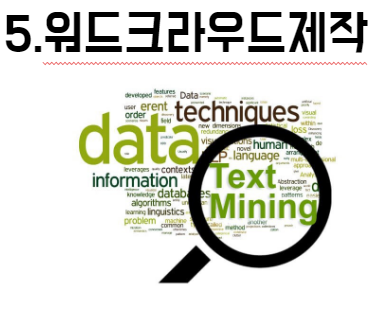

In [ ]:
#3-1. 1단계에서 만들어진 리스트변수의 본문들을 합쳐서 워드크라우드를 만드는 라이브러리를 만든다.
!pip install wordcloud
# import sys
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS) #불용어 지정 (조사등)
wc = WordCloud(font_path="BMJUA_ttf.ttf",stopwords=stopwords) #wc 변수에 wordcloud 객체지정
wc.generate(str(news_title_lists))
wc.to_file('wordcloud.png')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#write your code (백견이 불여일타)

ㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁ

# 응용 (단어 10개 워드크라우드 만들기)

In [ ]:
keyword_list = ['반도체',
               'NFT',
               '블록체인',
               'DigitalTransformation',
               '4차산업혁명',
               '파이썬업무자동화',
               'AI',
               '머신러닝',
               '딥러닝',
               'NEXT'
               ]

In [ ]:
#시간기다리기 (로딩될때까지 기다리기최대 5초까지 기다리기)
driver.implicitly_wait(time_to_wait=5)
    #1-1 인터넷을 킨다.
from selenium import webdriver
#PC용
driver = webdriver.Chrome(service=service)
# ##colab용
# driver = webdriver.Chrome('chromedriver', options=options)

for keyword in keyword_list:
    #0- 코드사이를 기다려주는 기능


    #1-2.네이버에 접속한다.
    driver.get("https://www.naver.com")

    #1-3.원하는 키워드를 검색한다.
    greenbox = driver.find_element(By.XPATH,"/html/body/div[2]/div[2]/div[1]/div/div[3]/form/fieldset/div/input")
    greenbox.send_keys(keyword)
    driver.find_element(By.CLASS_NAME,"ico_search_submit").click()

    #1-4.반도체 검색>뉴스 링크를 바로 접속한다.(+ 최신순)
    driver.get(f"https://search.naver.com/search.naver?where=news&sm=tab_jum&query={keyword}")

    #1-5.뉴스탭에 나오는 기사들을 최신순으로 배열하여 리스트 변수에 담는다.
    first_sel = driver.find_element(By.CLASS_NAME,"list_news")
    second_sel = first_sel.find_elements(By.TAG_NAME,"li")
    news_title_lists = []
    for a in second_sel:
        news_title_lists.append(a.text.replace("\n",""))
    print("----------------------------------추출한 텍스트는? -----------------------------------------")
    print(news_title_lists)

    #2-1. 1단계에서 만들어진 리스트변수를 엑셀로 변환한다.
    import pandas as pd #pandas 라이브러리를 가져온다.
    df = pd.DataFrame(news_title_lists) #news_title_lists 에 있는 데이터를 pandas데이터프레임으로 저장한다.
    df.to_excel(f'bhyunco_test_{keyword}.xlsx')

    #3-1. 1단계에서 만들어진 리스트변수의 본문들을 합쳐서 워드크라우드를 만드는 라이브러리를 만든다.
    from wordcloud import WordCloud, STOPWORDS
    stopwords = set(STOPWORDS) #불용어 지정 (조사등)
    wc = WordCloud(font_path="BMJUA_ttf.ttf",stopwords=stopwords) #wc 변수에 wordcloud 객체지정
    wc.generate(str(news_title_lists))
    wc.to_file(f'wordcloud_{keyword}.png')



----------------------------------추출한 텍스트는? -----------------------------------------
["문서 저장하기연합뉴스4시간 전네이버뉴스3분기 반도체 생산 11% 급감…2008년 이후 최대폭 감소제조업 생산 2분기 연속 감소…반도체 재고 넉 달째 늘어 올해 3분기 반도체 생산이 두 자릿수 감소를 기록하며 2008년 이후 가장 큰 폭으로 줄었다. 반도체가 떠받치는 제조업 생산도 2분기 연속으로 감소하면서...IT조선6분 전3Q 반도체 생산량 감소폭 2008년 이후 최대한국경제TV2시간 전네이버뉴스3분기 반도체 생산 11% 급감…재고 넉 달째 늘어더팩트1시간 전네이버뉴스3분기 반도체 생산 11% '뚝'…글로벌 금융위기 이후 최대폭YTN12분 전네이버뉴스3분기 반도체 생산 11% 급감...금융위기 뒤 최대 감소관련뉴스 14건 전체보기", 'IT조선6분 전3Q 반도체 생산량 감소폭 2008년 이후 최대', '한국경제TV2시간 전네이버뉴스3분기 반도체 생산 11% 급감…재고 넉 달째 늘어', "더팩트1시간 전네이버뉴스3분기 반도체 생산 11% '뚝'…글로벌 금융위기 이후 최대폭", 'YTN12분 전네이버뉴스3분기 반도체 생산 11% 급감...금융위기 뒤 최대 감소', '문서 저장하기뉴시스9분 전네이버뉴스국내기업 등 반도체 특허출원 심사기간, 10개월 빨라진다생산하는 반도체기술 분야 특허출원을 1일부터 1년간 우선심사 대상으로 지정한다고 밝혔다. 이번 조치를 통해 국내 반도체 관련 기업, 연구개발기관, 대학 등이 우선심사를 이용할 경우 평균 2.5개월 만에 특허심사를 받을...뉴스11시간 전네이버뉴스특허청, 반도체 기술 특허출원 우선심사…10개월 단축파이낸셜뉴스1시간 전네이버뉴스특허청, 반도체 기술 특허출원 우선심사 시행연합뉴스1시간 전네이버뉴스국내 개발 반도체 기술 특허출원 우선심사…블록체인 기술도더팩트6분 전네이버뉴스특허청, 반도체 기술 특허출원 1년간 우선심사관련뉴스 8건 전체보기', '뉴스11시간 전네이버

# 4. 크롤링의 허용
크롤링의 허용 여부 체크 (싸이트명/robots.txt)  https://namu.wiki/w/robots.txt <br>
google에서 크롤링을 공식적으로 허용한 사이트 - https://www.google.com/search/howsearchworks/

In [ ]:
#싸이트에 접속
driver.get("https://www.google.com/search/howsearchworks/") # 문자열의 의미 / 메쏘드의 의미
#싸이트 HTML 코드 가져오기
driver.page_source

'<html lang="en" class="ready"><head>\n    <meta charset="utf-8">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\n    <title>Google Search - Discover How Google Search Works</title>\n    <meta name="description" content="Wondering how Google Search works? Learn how Google looks through and organizes all the information on the internet to give you the most useful and relevant Search results in a fraction of a second.">\n    <link rel="canonical" href="https://www.google.com/search/howsearchworks/">\n    <meta name="referrer" content="no-referrer">\n    <link href="https://www.google.com/intl/ar/search/howsearchworks/" hreflang="ar" rel="alternate">\n    <link href="https://www.google.com/intl/bg/search/howsearchworks/" hreflang="bg" rel="alternate">\n    <link href="https://www.google.com/intl/ca-FR/search/howsearchworks/" hreflang="ca-fr" rel="alternate">\n    <link href="https://www.google.com/intl/cs/search/howsearchworks/" hreflang="cs" rel="alternate">\

In [ ]:
#write your code (백견이 불여일타)

## 데이터 저장방법

In [ ]:
#1단계 - 리스트 제작
my_list = [
    [1,2,3],
    [4,5,6],
    [7,8,9]
]

In [ ]:

#2단계 - pandas DataFrame으로 변환
import pandas as pd
df = pd.DataFrame(my_list)
df

0  1  2
0  1  2  3
1  4  5  6
2  7  8  9

In [ ]:

#3단계 - 열값을 변경후 엑셀로 저장

df.columns = ['A카테고리','B카테고리','C카테고리']
df

A카테고리  B카테고리  C카테고리
0      1      2      3
1      4      5      6
2      7      8      9

In [ ]:
df.to_excel('test.xlsx')

## 속도비교

프롬프트 참고
https://chat.openai.com/share/de34344f-7a28-4461-9c2e-3c8961ad06a3

In [ ]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By

# 상수 정의
NAVER_URL = "https://www.naver.com"
SEARCH_KEYWORD = "반도체"
NEWS_URL = "https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EB%B0%98%EB%8F%84%EC%B2%B4"

# 요소 선택자 정의
SEARCH_BOX_XPATH = "/html/body/div[2]/div[1]/div/div[3]/div[2]/div/form/fieldset/div/input"
SEARCH_BUTTON_CLASS = "ico_btn_search"
NEWS_LIST_CLASS = "list_news"
NEWS_ITEM_TAG = "li"

# 웹드라이버 설정
# driver = webdriver.Chrome(service=service)  # PC버전
# driver = webdriver.Chrome('chromedriver', options=options)  # colab버전

start_time = time.time()  # 시간 측정 시작

driver.get(NAVER_URL)

search_box = driver.find_element(By.XPATH, SEARCH_BOX_XPATH)
search_box.send_keys(SEARCH_KEYWORD)
driver.find_element(By.CLASS_NAME, SEARCH_BUTTON_CLASS).click()

driver.get(NEWS_URL)

news_list = driver.find_element(By.CLASS_NAME, NEWS_LIST_CLASS)
news_items = news_list.find_elements(By.TAG_NAME, NEWS_ITEM_TAG)

news_title_lists = [item.text.replace("\n", "") for item in news_items]

print("----------------------------------추출한 텍스트는? -----------------------------------------")
print(news_title_lists)

end_time = time.time()  # 시간 측정 종료
print("코드 실행 시간: {}초".format(end_time - start_time))


----------------------------------추출한 텍스트는? -----------------------------------------
['문서 저장하기조선일보언론사 선정1시간 전네이버뉴스챗GPT 아버지 샘 올트먼“한국과 전용 반도체 칩 개발하고 싶어”한국 기업·스타트업과의 구체적 협력 방안으로는 “OpenAI가 이용할 수 있는 전용 반도체 칩을 함께 개발하고 싶다”고도 했다. 간담회에 참석한 스타트업들은 올트먼 대표에게 OpenAI의 서비스와 기업 및 개인정보 보호...', '문서 저장하기연합뉴스언론사 선정1일 전네이버뉴스지능형·전력 반도체 등 유망기술 선제확보…반도체 초격차 유지반도체 국가전략회의…1.4조원 규모 예타 추진 메모리 가치사슬, 시스템반도체로 확장…올 하반기 \'3천억 반도체 펀드\' 출범 신기술 요람 \'첨단반도체센터\' 추진…2027년까지 2.8조원 정책금융도 "\'파괴적 혁신\'으로...조선비즈언론사 선정1일 전네이버뉴스“반도체 초격차 유지”… 하반기에 3000억원 규모 반도체펀드 출범서울경제언론사 선정21시간 전네이버뉴스尹 "반도체 국가총력전"…3000억 스타트업 스케일업 신규펀드 조성전자신문언론사 선정1일 전네이버뉴스[국가전략회의-반도체]정부 “민·관 합심해 ‘반도체 초강대국’ 달성”이데일리20시간 전네이버뉴스"유망 반도체 기술 선제확보"…1.4조원 R&D 지원관련뉴스 6건 전체보기', '조선비즈언론사 선정1일 전네이버뉴스“반도체 초격차 유지”… 하반기에 3000억원 규모 반도체펀드 출범', '서울경제언론사 선정21시간 전네이버뉴스尹 "반도체 국가총력전"…3000억 스타트업 스케일업 신규펀드 조성', '전자신문언론사 선정1일 전네이버뉴스[국가전략회의-반도체]정부 “민·관 합심해 ‘반도체 초강대국’ 달성”', '이데일리20시간 전네이버뉴스"유망 반도체 기술 선제확보"…1.4조원 R&D 지원', '문서 저장하기파이낸셜뉴스언론사 선정5시간 전네이버뉴스경제성장률 전망 낮춘 OECD "중국, 반도체 때문"...블록화·분절화 극

In [ ]:
import time
import requests
from bs4 import BeautifulSoup

# 상수 정의
NEWS_URL = "https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EB%B0%98%EB%8F%84%EC%B2%B4"

# 요소 선택자 정의
NEWS_ITEM_SELECTOR = "ul.list_news > li"

start_time = time.time()  # 시간 측정 시작

res = requests.get(NEWS_URL)
soup = BeautifulSoup(res.text, 'html.parser')

news_items = soup.select(NEWS_ITEM_SELECTOR)
news_title_lists = [item.text.replace("\n", "") for item in news_items]

print("----------------------------------추출한 텍스트는? -----------------------------------------")
print(news_title_lists)

end_time = time.time()  # 시간 측정 종료
print("코드 실행 시간: {}초".format(end_time - start_time))


----------------------------------추출한 텍스트는? -----------------------------------------
['     문서 저장하기  Keep에 저장 Keep 바로가기  조선일보언론사 선정1시간 전네이버뉴스 챗GPT 아버지 샘 올트먼“한국과 전용 반도체 칩 개발하고 싶어”   한국 기업·스타트업과의 구체적 협력 방안으로는 “OpenAI가 이용할 수 있는 전용 반도체 칩을 함께 개발하고 싶다”고도 했다. 간담회에 참석한 스타트업들은 올트먼 대표에게 OpenAI의 서비스와 기업 및 개인정보 보호...  ', '     문서 저장하기  Keep에 저장 Keep 바로가기  연합뉴스언론사 선정1일 전네이버뉴스 지능형·전력 반도체 등 유망기술 선제확보…반도체 초격차 유지   반도체 국가전략회의…1.4조원 규모 예타 추진 메모리 가치사슬, 시스템반도체로 확장…올 하반기 \'3천억 반도체 펀드\' 출범 신기술 요람 \'첨단반도체센터\' 추진…2027년까지 2.8조원 정책금융도 "\'파괴적 혁신\'으로...       조선비즈언론사 선정1일 전네이버뉴스 “반도체 초격차 유지”… 하반기에 3000억원 규모 반도체펀드 출범     서울경제언론사 선정21시간 전네이버뉴스 尹 "반도체 국가총력전"…3000억 스타트업 스케일업 신규펀드 조성     전자신문언론사 선정1일 전네이버뉴스 [국가전략회의-반도체]정부 “민·관 합심해 ‘반도체 초강대국’ 달성”     이데일리20시간 전네이버뉴스 "유망 반도체 기술 선제확보"…1.4조원 R&D 지원  관련뉴스 6건 전체보기 ', '     문서 저장하기  Keep에 저장 Keep 바로가기  파이낸셜뉴스언론사 선정5시간 전네이버뉴스  경제성장률 전망 낮춘 OECD "중국, 반도체 때문"...블록화·분절화 극복 제시   5%로 하향 조정한 것에 대해, 방 차관은 "중국 리오프닝 효과와 반도체 등 경기회복이 본격화되면... 차관은 "향후 차관회의 등을 통해 해결방안을 적극 모색하겠다"고 밝혔다. #OE

In [ ]:
#실습에 필요한 라이브러리가 가져오기(추후 설명 예정)
#PC버전
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
service = Service(executable_path=ChromeDriverManager().install()) #크롬드라이버 설치
options = webdriver.ChromeOptions()
options.add_argument('--no-sandbox')

driver = webdriver.Chrome(service=service) #드라이브 켜기


[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.30M/6.30M [00:00<00:00, 48.6MB/s]


# 크롤링프로젝트_1

## 미션 :
네이버에서 "생성형AI"검색 후 뉴스를 클릭했을 때, 출력되는 제목을 10개 가져와서, 리스트변수로 저장하기

In [ ]:
#풀이

In [ ]:
#해답

# 크롤링프로젝트_2

In [ ]:
#참고
my_list = [
    [1,2,3],
    [4,5,6],
    [7,8,9]
]
import pandas as pd
df = pd.DataFrame(my_list)
df.columns = ['A','B','C']
print(df)
df.to_excel('test.xlsx')

## 미션 : 프로젝트1에서 제작완료된 데이터 엑셀로 만들기

In [ ]:
#풀이

In [ ]:
#해답

# 크롤링프로젝트_3

- 연습 - https://bhyuncocrawling.netlify.app/iframe_site/iframe.html에서
class 명이 art_tit 인 것을 찾아서 출력하라


In [ ]:
#연습

## 미션 : 카페커뮤니티 데이터 확보하기 https://cafe.naver.com/kig
 서울 1page 게시물정보 확보 엑셀 파일로 저장하기


In [ ]:
#풀이

In [ ]:
#해답

# 크롤링프로젝트_4
ChatGPT를 활용하여 테슬라 주식 1년 거래데이터를 가져오기

In [ ]:
#풀이

In [ ]:
#해답

# 크롤링프로젝트_5
웹크롤링 속도 향상시키기

In [ ]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By

# 상수 정의
NAVER_URL = "https://www.naver.com"
SEARCH_KEYWORD = "반도체"
NEWS_URL = "https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EB%B0%98%EB%8F%84%EC%B2%B4"

# 요소 선택자 정의
SEARCH_BOX_XPATH = "/html/body/div[2]/div[1]/div/div[3]/div[2]/div/form/fieldset/div/input"
SEARCH_BUTTON_CLASS = "ico_btn_search"
NEWS_LIST_CLASS = "list_news"
NEWS_ITEM_TAG = "li"

# 웹드라이버 설정
# driver = webdriver.Chrome(service=service)  # PC버전
# driver = webdriver.Chrome('chromedriver', options=options)  # colab버전

start_time = time.time()  # 시간 측정 시작

driver.get(NAVER_URL)

search_box = driver.find_element(By.XPATH, SEARCH_BOX_XPATH)
search_box.send_keys(SEARCH_KEYWORD)
driver.find_element(By.CLASS_NAME, SEARCH_BUTTON_CLASS).click()

driver.get(NEWS_URL)

news_list = driver.find_element(By.CLASS_NAME, NEWS_LIST_CLASS)
news_items = news_list.find_elements(By.TAG_NAME, NEWS_ITEM_TAG)

news_title_lists = [item.text.replace("\n", "") for item in news_items]

print("----------------------------------추출한 텍스트는? -----------------------------------------")
print(news_title_lists)

end_time = time.time()  # 시간 측정 종료
print("코드 실행 시간: {}초".format(end_time - start_time))


----------------------------------추출한 텍스트는? -----------------------------------------
['문서 저장하기뉴시스언론사 선정14시간 전네이버뉴스"국대급 인재 키워라"…국가 반도체 연구실에 25억 연구비 지원정부가 국가대표 반도체 우수 인재 양성을 위해 \'국가 반도체 연구실\'을 만든다. 국가 반도체 연구실로 선정된 기관은 5년 간 총 25억원의 연구비를 지원받게 된다. 이종호 과학기술정보통신부 장관은 29일 고려대학교에서...연합뉴스14시간 전네이버뉴스"반도체 국가대표 양성한다" 국가 반도체 연구실 9곳 지정뉴스114시간 전네이버뉴스"반도체 국가대표 양성"…국가 반도체 연구실 9곳 지정경향신문9시간 전네이버뉴스고려대·전남대·포항공대·카이스트, 석·박사급 반도체 인재 키운다디지털데일리언론사 선정9시간 전네이버뉴스반도체 한 우물 파기…정부, 5년간 연구비 25억원 쏟는다 [소부장반차장]관련뉴스 13건 전체보기', '연합뉴스14시간 전네이버뉴스"반도체 국가대표 양성한다" 국가 반도체 연구실 9곳 지정', '뉴스114시간 전네이버뉴스"반도체 국가대표 양성"…국가 반도체 연구실 9곳 지정', '경향신문9시간 전네이버뉴스고려대·전남대·포항공대·카이스트, 석·박사급 반도체 인재 키운다', '디지털데일리언론사 선정9시간 전네이버뉴스반도체 한 우물 파기…정부, 5년간 연구비 25억원 쏟는다 [소부장반차장]', '문서 저장하기파이낸셜뉴스언론사 선정13시간 전네이버뉴스삼성, 반도체 매출 1위 탈환 실패…SK하닉은 10위권 밖으로삼성전자가 종합반도체기업(IDM) 라이벌 인텔에 밀려 전 세계 반도체 기업 매출 1위 탈환에 또 실패했다. 주력 사업인 메모리반도체의 전례없는 업황 침체 여파로 분석된다. 메모리 의존도가 90%가 넘는...아시아경제언론사 선정9시간 전네이버뉴스삼성전자, 1분기 반도체 시장 2위…SK하이닉스 10위권 밖아이뉴스24언론사 선정7시간 전네이버뉴스"인텔에 또 밀리다니"…\'메모리 직격타\' 맞은 韓 

In [ ]:
#풀이

In [ ]:
#정답

# 크롤링 프로젝트6

## 6-1.
네이버 웹사이트에서 웹툰검색 후 출력되는 웹툰 중 오늘 요일에 Top1~Top15 웹툰 제목/작가/접속url 출력하기

In [ ]:
#풀이

In [ ]:
#정답

6-2 만들고 싶은 크롤러 제작해보기